In [1]:
import cv2 as cv
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

2023-05-18 21:54:44.117916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 21:54:44.292855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shahzaib/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-18 21:54:44.292883: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-18 21:54:44.334667: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alread

## Automate the Preprocessing

In [2]:
class FaceLoading:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
    

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [3]:
faceloading = FaceLoading("dataset")
X, Y = faceloading.load_classes()

2023-05-18 21:54:47.092562: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shahzaib/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-18 21:54:47.092634: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-18 21:54:47.092667: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shahzaib-HP-ProBook-650-G2): /proc/driver/nvidia/version does not exist
2023-05-18 21:54:47.093036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 37ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 23ms/step
Loaded successfully: 14
1/1 [==============================] - 0s 39ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 25ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 30ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 40ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 28ms/step
Loaded successfully: 7
1/1 [==============================] - 0s 37ms/step
Loaded successfully: 11


In [4]:
print(set(Y))

{'ahtisham', 'proxy', 'danish', 'shahzaib', 'azam', 'jawad', 'zohaib', 'afraz'}


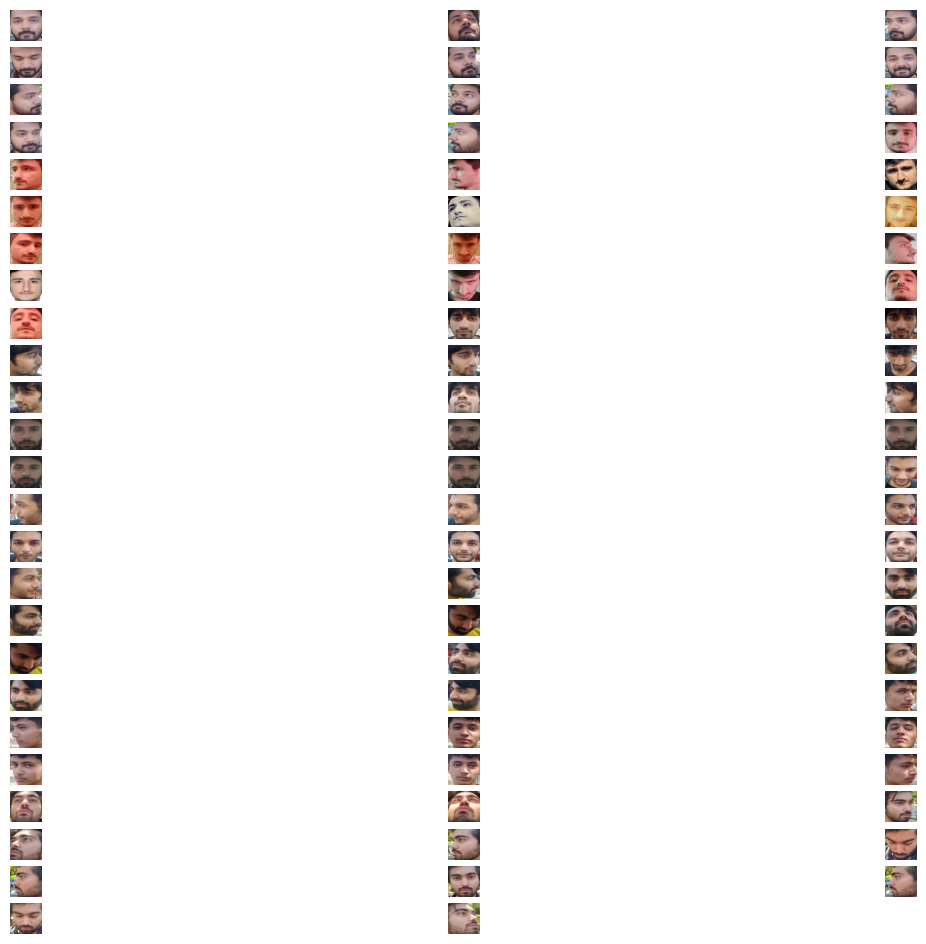

In [5]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

# FaceNet

In [6]:
#!pip install keras-facenet

In [7]:
from keras_facenet import FaceNet
embedder = FaceNet()

In [8]:
def get_embedding(face_img):
      face_img = face_img.astype('float32') # 3D(160x160x3)
      face_img = np.expand_dims(face_img, axis=0) # bcz tensorflow requires 4 dimensions
      # 4D (Nonex160x160x3)
      yhat= embedder.embeddings(face_img)
      return yhat[0] # 512D image (1x1x512)

In [9]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 71ms/step


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
import pandas as pd
df=pd.DataFrame({'Names':Y.copy()})
df['Encoded']=encoder.fit_transform(Y)
df=df.drop_duplicates().reset_index()
df.drop(columns='index',axis=1,inplace=True)
df=df.sort_values('Encoded')

In [13]:
df

,Names,Encoded
0,afraz,0
5,ahtisham,1
3,azam,2
7,danish,3
6,jawad,4
2,proxy,5
1,shahzaib,6
4,zohaib,7


In [14]:
df.to_csv('classes.csv',index=False)

In [15]:
Y=encoder.fit_transform(Y)

Text(0, 0.5, '0')

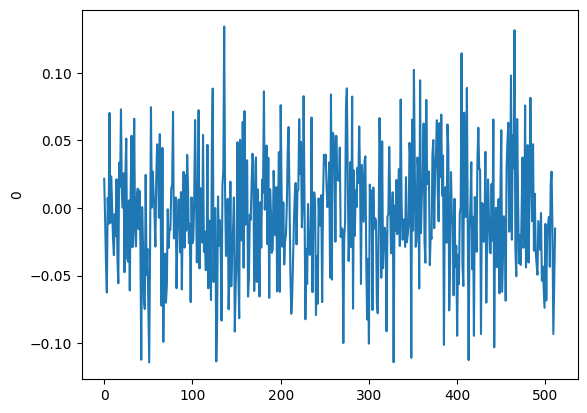

In [16]:
plt.plot(EMBEDDED_X[0]) 
plt.ylabel(Y[0])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True,random_state=17)

In [18]:
print(len(X_train[0]))

512


In [19]:
import numpy as np
np.shape(X_train[0])

(512,)

In [20]:
y_train_one_hot = np.eye(len(set(Y)))[Y_train]
y_test_one_hot = np.eye(len(set(Y)))[Y_test]

In [21]:
import tensorflow as tf
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [22]:
input_shape = (512,)

In [23]:
num_classes = len(set(Y))

In [24]:
nn_model = Sequential([
    Dense(256, activation='relu', input_shape=input_shape,kernel_regularizer=regularizers.l2(0.01)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [25]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 8)                 264       
                                                                 
Total params: 174,824
Trainable params: 174,824
Non-trainable params: 0
_________________________________________________________________


In [26]:
nn_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
history = nn_model.fit(X_train, y_train_one_hot,
                    batch_size=16,
                    epochs=20,
                    validation_data=(X_test, y_test_one_hot))

Epoch 1/20
4/4 [==============================] - 1s 107ms/step - loss: 5.3492 - accuracy: 0.2000 - val_loss: 5.0441 - val_accuracy: 0.3158
Epoch 2/20
4/4 [==============================] - 0s 17ms/step - loss: 4.8871 - accuracy: 0.5818 - val_loss: 4.6200 - val_accuracy: 0.4737
Epoch 3/20
4/4 [==============================] - 0s 18ms/step - loss: 4.4472 - accuracy: 0.6545 - val_loss: 4.2122 - val_accuracy: 0.4211
Epoch 4/20
4/4 [==============================] - 0s 19ms/step - loss: 4.0210 - accuracy: 0.6545 - val_loss: 3.8231 - val_accuracy: 0.3684
Epoch 5/20
4/4 [==============================] - 0s 16ms/step - loss: 3.5756 - accuracy: 0.6182 - val_loss: 3.4259 - val_accuracy: 0.4737
Epoch 6/20
4/4 [==============================] - 0s 16ms/step - loss: 3.1218 - accuracy: 0.6909 - val_loss: 3.0530 - val_accuracy: 0.4737
Epoch 7/20
4/4 [==============================] - 0s 15ms/step - loss: 2.6803 - accuracy: 0.8000 - val_loss: 2.7206 - val_accuracy: 0.5789
Epoch 8/20
4/4 [==========

[]

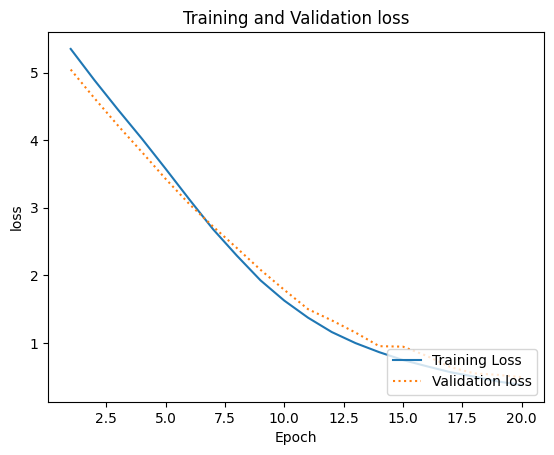

In [28]:
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Loss')
plt.plot(epochs, val_acc, ':', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.plot()

In [29]:
nn_model.save('face_model.h5')